In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint as sp_randint

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

from sklearn.metrics import confusion_matrix as cm
from sklearn import preprocessing as prep
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [37]:
data = pd.read_csv("UCI_Credit_Card.csv")

In [38]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [39]:
#From this we see that there are no missing values in this dataset
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [40]:
# Renaming the target variable 
data.rename(columns={"default.payment.next.month": "Default"}, inplace=True)
data.drop('ID', axis = 1, inplace =True) # drop ID column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [41]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [42]:
#Renaming column groups (Pay, Bill_Amt, and Pay_Amt) for a more clear description

data.rename(columns={"PAY_0": "RepayStatus_Sept","PAY_2": "RepayStatus_Aug","PAY_3": "RepayStatus_July","PAY_4": "RepayStatus_June","PAY_5": "RepayStatus_May","PAY_6": "RepayStatus_April",
                                              "PAY_AMT1": "PAY_AMT_Sept","PAY_AMT2": "PAY_AMT_Aug","PAY_AMT3": "PAY_AMT_July","PAY_AMT4": "PAY_AMT_June","PAY_AMT5": "PAY_AMT_May","PAY_AMT6": "PAY_AMT_April",
                                              "BILL_AMT1": "BILL_AMT_Sept","BILL_AMT2": "BILL_AMT_Aug","BILL_AMT3": "BILL_AMT_July","BILL_AMT4": "BILL_AMT_June","BILL_AMT5": "BILL_AMT_May","BILL_AMT6": "BILL_AMT_April"}, inplace=True)



In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LIMIT_BAL          30000 non-null  float64
 1   SEX                30000 non-null  int64  
 2   EDUCATION          30000 non-null  int64  
 3   MARRIAGE           30000 non-null  int64  
 4   AGE                30000 non-null  int64  
 5   RepayStatus_Sept   30000 non-null  int64  
 6   RepayStatus_Aug    30000 non-null  int64  
 7   RepayStatus_July   30000 non-null  int64  
 8   RepayStatus_June   30000 non-null  int64  
 9   RepayStatus_May    30000 non-null  int64  
 10  RepayStatus_April  30000 non-null  int64  
 11  BILL_AMT_Sept      30000 non-null  float64
 12  BILL_AMT_Aug       30000 non-null  float64
 13  BILL_AMT_July      30000 non-null  float64
 14  BILL_AMT_June      30000 non-null  float64
 15  BILL_AMT_May       30000 non-null  float64
 16  BILL_AMT_April     300

In [44]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,RepayStatus_Sept,RepayStatus_Aug,RepayStatus_July,RepayStatus_June,RepayStatus_May,...,BILL_AMT_June,BILL_AMT_May,BILL_AMT_April,PAY_AMT_Sept,PAY_AMT_Aug,PAY_AMT_July,PAY_AMT_June,PAY_AMT_May,PAY_AMT_April,Default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [45]:
# unique values for columns

In [46]:
data['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [47]:
data['EDUCATION']=np.where(data['EDUCATION'] == 5, 0, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 6, 0, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 0, 4, data['EDUCATION'])

In [48]:
data['EDUCATION'].unique()

array([2, 1, 3, 4])

In [49]:
data['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [50]:
data['MARRIAGE']=np.where(data['MARRIAGE'] == 0, 3, data['MARRIAGE'])
data['MARRIAGE'].unique()

array([1, 2, 3])

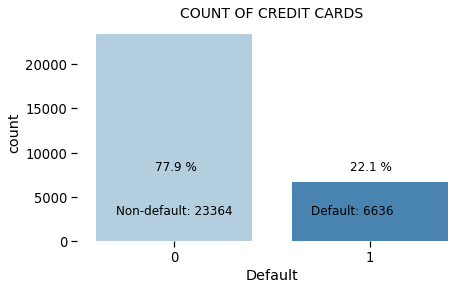

In [51]:
# the frequency of defaults
yes = data.Default.sum()
no = len(data)-yes

# percentage
yes_perc = round(yes/len(data)*100, 1)
no_perc = round(no/len(data)*100, 1)

import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('Default',data=data, palette="Blues")
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('COUNT OF CREDIT CARDS', size=14)

plt.box(False);

In [52]:
# anova tables

                sum_sq       df           F         PR(>F)
LIMIT_BAL   121.803998      1.0  724.068539  1.302244e-157
Residual   5046.312802  29998.0         NaN            NaN


In [53]:
anova2 = ols('Default ~ RepayStatus_Sept', data=data).fit()
print(sm.stats.anova_lm(anova2,typ=2))

                       sum_sq       df           F  PR(>F)
RepayStatus_Sept   545.189634      1.0  3537.71497     0.0
Residual          4622.927166  29998.0         NaN     NaN


In [55]:
anova3 = ols('Default ~ RepayStatus_Aug', data=data).fit()
print(sm.stats.anova_lm(anova3,typ=2))

                      sum_sq       df            F  PR(>F)
RepayStatus_Aug   358.973444      1.0  2239.169136     0.0
Residual         4809.143356  29998.0          NaN     NaN


In [35]:
anova4 = ols('Default ~ RepayStatus_July', data=data).fit()
print(sm.stats.anova_lm(anova4,typ=2))

                       sum_sq       df            F  PR(>F)
RepayStatus_July   286.022939      1.0  1757.466444     0.0
Residual          4882.093861  29998.0          NaN     NaN


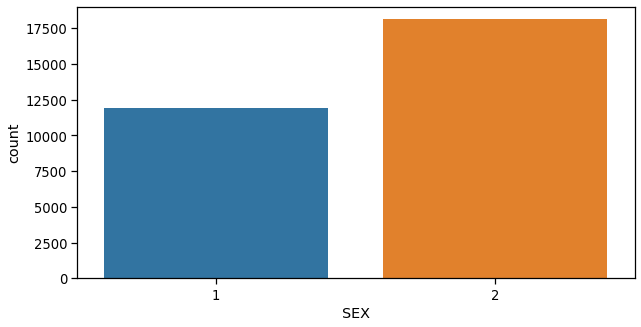

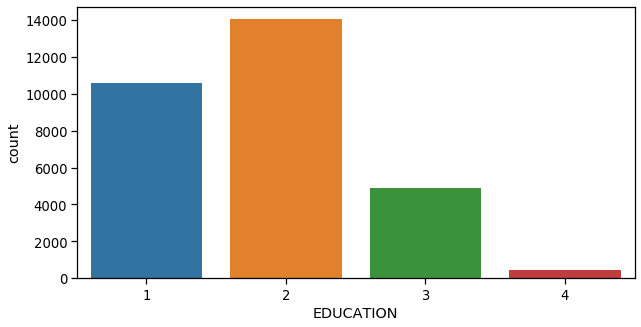

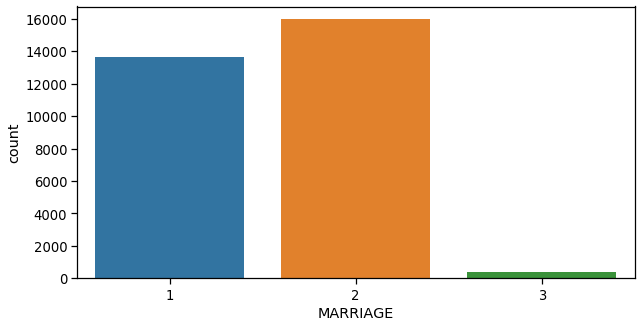

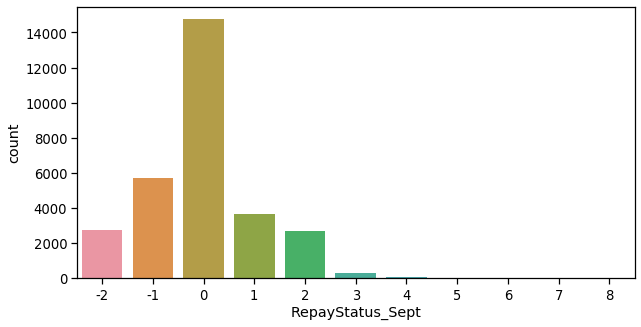

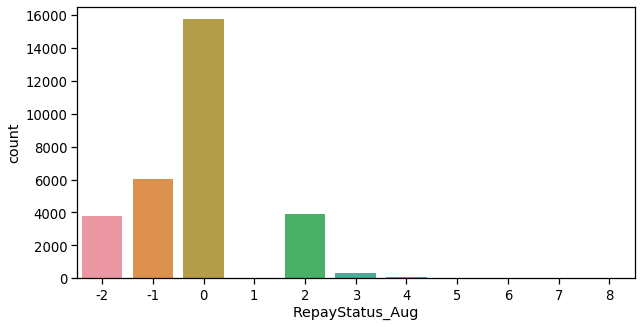

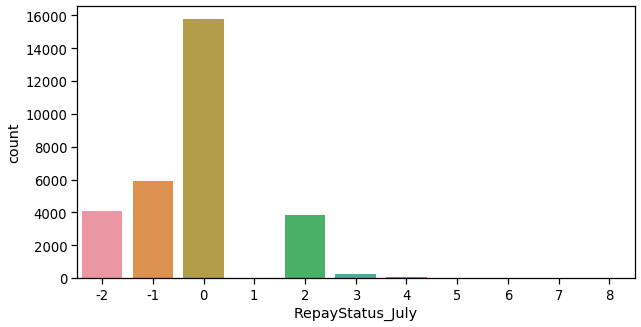

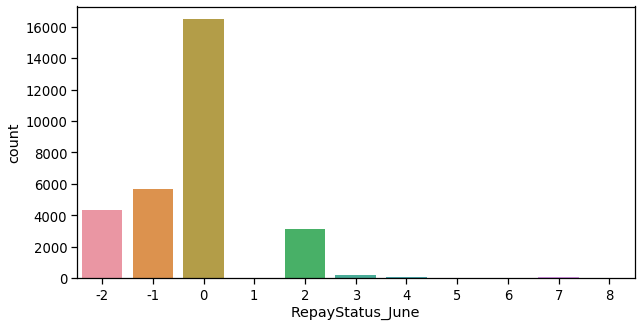

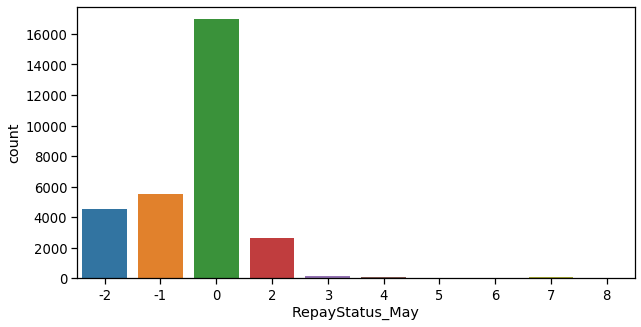

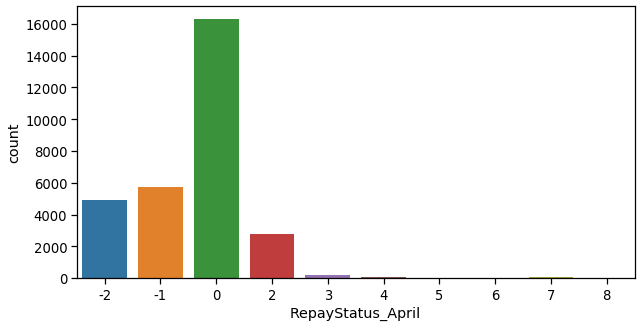

In [21]:
# EXPLORATORY ANALYSIS
# histograms that show count of selected attributes

for i in [ "SEX", "EDUCATION", "MARRIAGE", "RepayStatus_Sept","RepayStatus_Aug","RepayStatus_July","RepayStatus_June","RepayStatus_May","RepayStatus_April"]:
    plt.figure(figsize=(10,5))
    sns.countplot(data[i])
    plt.show()

Text(0, 0.5, 'Percentage')

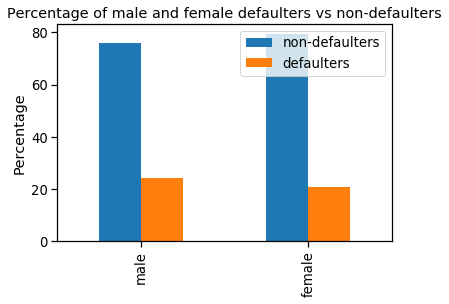

In [22]:
# percentage of gender defaulters vs non-defaulters

number_of_male_card_holders = (data.SEX == 1).sum() #11,888
number_of_female_card_holders = (data.SEX == 2).sum() #18,112

number_of_male_defaulters = (data[data.SEX == 1].Default == 1).sum()
number_of_female_defaulters = (data[data.SEX == 2].Default == 1).sum()

percentage_of_male_def = round((number_of_male_defaulters/number_of_male_card_holders) * 100,2)
percentage_of_female_def = round((number_of_female_defaulters/number_of_female_card_holders) * 100,2)
temp_df = pd.DataFrame({"non-defaulters":{"male":100 - percentage_of_male_def, "female":100 - percentage_of_female_def},"defaulters":{"male":percentage_of_male_def, "female":percentage_of_female_def}})

# plotting chart

fig = temp_df.plot(kind = 'bar')
fig.set_title("Percentage of male and female defaulters vs non-defaulters")
fig.set_ylabel("Percentage")

Text(0, 0.5, 'Percentage')

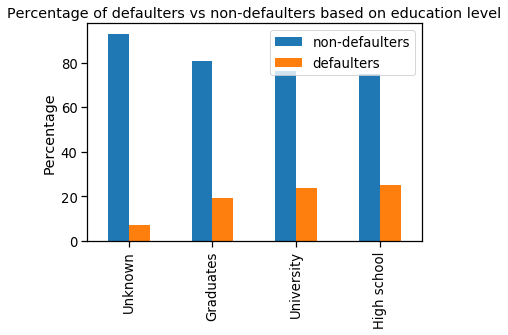

In [23]:
# percentage of defaulters vs non-defaulters by education

number_of_unknown_edu_card_holders = (data.EDUCATION == 4).sum()
number_of_grad_edu_card_holders = (data.EDUCATION == 1).sum()
number_of_uni_card_holders = (data.EDUCATION == 2).sum()
number_of_high_school_card_holders = (data.EDUCATION == 3).sum()

number_of_unknown_edu_defaulters = (data[(data.EDUCATION == 4)].Default == 1).sum()
number_of_grad_defaulters = (data[(data.EDUCATION == 1)].Default == 1).sum()
number_of_uni_defaulters = (data[(data.EDUCATION == 2)].Default == 1).sum()
number_of_high_school_defaulters = (data[(data.EDUCATION == 3)].Default == 1).sum()

percentage_of_unknown_def = round((number_of_unknown_edu_defaulters/number_of_unknown_edu_card_holders) * 100,2)
percentage_of_grad_def = round((number_of_grad_defaulters/number_of_grad_edu_card_holders) * 100,2)
percentage_of_uni_def = round((number_of_uni_defaulters/number_of_uni_card_holders) * 100,2)
percentage_of_high_school_def = round((number_of_high_school_defaulters/number_of_high_school_card_holders) * 100,2)
temp_df = pd.DataFrame({"non-defaulters":{"Unknown":100 - percentage_of_unknown_def, "Graduates":100 - percentage_of_grad_def, "University":100 - percentage_of_uni_def, "High school":100 - percentage_of_high_school_def},"defaulters":{"Unknown": percentage_of_unknown_def, "Graduates": percentage_of_grad_def, "University": percentage_of_uni_def, "High school":percentage_of_high_school_def}})

# plotting chart

fig = temp_df.plot(kind = 'bar')
fig.set_title("Percentage of defaulters vs non-defaulters based on education level")
fig.set_ylabel("Percentage")

Text(0, 0.5, 'Percentage')

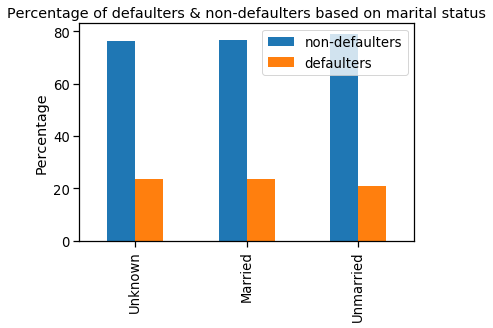

In [24]:
# percentage of defaulters vs non-defaulters by marital status

number_of_others_card_holders = (data.MARRIAGE == 3).sum()
number_of_married_card_holders = (data.MARRIAGE == 1).sum()
number_of_unmarried_card_holders = (data.MARRIAGE == 2).sum()

number_of_others_def = (data[(data.MARRIAGE == 3)].Default == 1).sum() #89
number_of_married_def = (data[(data.MARRIAGE == 1)].Default == 1).sum() #3,206
number_of_ummarried_def = (data[(data.MARRIAGE == 2)].Default == 1).sum() #3,341

percentage_of_others_def = round(number_of_others_def/number_of_others_card_holders * 100,2) #23.61
percentage_of_married_def = round(number_of_married_def/number_of_married_card_holders * 100,2) #23.47
percentage_of_ummarried_def = round(number_of_ummarried_def/number_of_unmarried_card_holders * 100,2) #20.93
temp_df = pd.DataFrame({"non-defaulters":{"Unknown":100 - percentage_of_others_def, "Married":100 - percentage_of_married_def, "Unmarried":100 - percentage_of_ummarried_def},
                        "defaulters":{"Unknown":percentage_of_others_def, "Married":percentage_of_married_def, "Unmarried": percentage_of_ummarried_def}})
# plotting chart

fig = temp_df.plot(kind = 'bar')
fig.set_title("Percentage of defaulters & non-defaulters based on marital status")
fig.set_ylabel("Percentage")

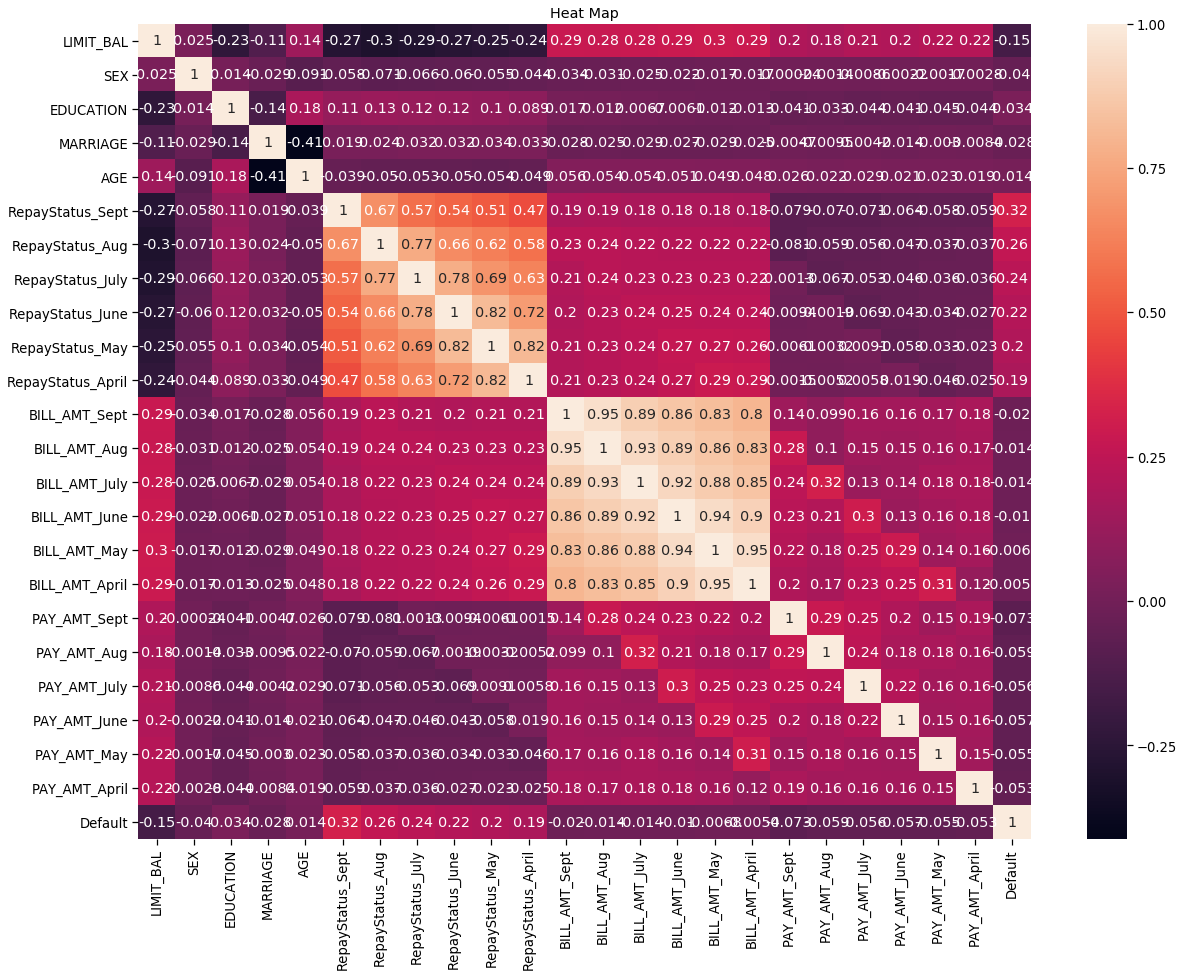

In [25]:
# looking at correlations matrix to see positive and negative correlations between vars

plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)
plt.title('Heat Map')
plt.show()

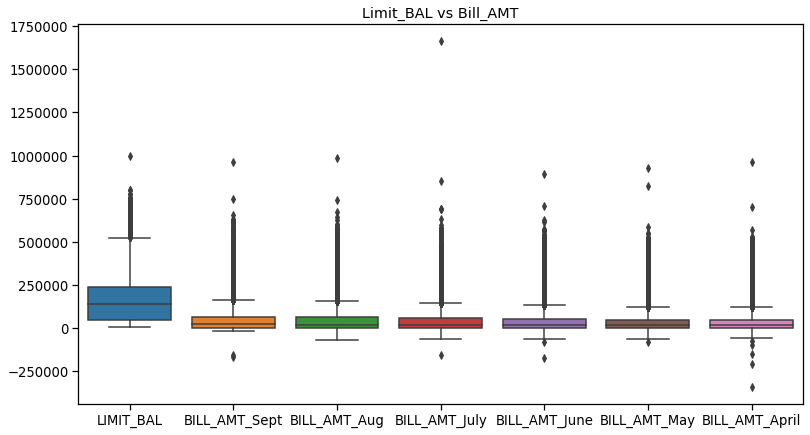

In [26]:
# Boxplot for Bill_AMT vs Limit_BAL

plt.figure(figsize=(13,7))
sns.boxplot(data=data[['LIMIT_BAL','BILL_AMT_Sept', 'BILL_AMT_Aug','BILL_AMT_July', 'BILL_AMT_June', 'BILL_AMT_May', 'BILL_AMT_April']])
plt.title('Limit_BAL vs Bill_AMT')
plt.show()

In [27]:
# one hot encoding
# convert each category into new column and assign a 1 or 0 value

In [28]:
# generate binary values for education using get_dummies

data_dum = pd.get_dummies(data, columns=["EDUCATION"], prefix=["Edu"] )
# merge with main data bridge_df on key values

data_dum = data.merge(data_dum, how='outer')
data_dum

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,RepayStatus_Sept,RepayStatus_Aug,RepayStatus_July,RepayStatus_June,RepayStatus_May,...,PAY_AMT_Aug,PAY_AMT_July,PAY_AMT_June,PAY_AMT_May,PAY_AMT_April,Default,Edu_1,Edu_2,Edu_3,Edu_4
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,1,0,1,0,0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,1000.0,1000.0,1000.0,0.0,2000.0,1,0,1,0,0
2,90000.0,2,2,2,34,0,0,0,0,0,...,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,1,0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,1,0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,36681.0,10000.0,9000.0,689.0,679.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30151,220000.0,1,3,1,39,0,0,0,0,0,...,20000.0,5003.0,3047.0,5000.0,1000.0,0,0,0,1,0
30152,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,3526.0,8998.0,129.0,0.0,0.0,0,0,0,1,0
30153,30000.0,1,2,2,37,4,3,2,-1,0,...,0.0,22000.0,4200.0,2000.0,3100.0,1,0,1,0,0
30154,80000.0,1,3,1,41,1,-1,0,0,0,...,3409.0,1178.0,1926.0,52964.0,1804.0,1,0,0,1,0


In [29]:
# generate binary values for gender using get_dummies

data_dum2 = pd.get_dummies(data, columns=["SEX"], prefix=["SEX"] )
# merge with main df bridge_df on key values

data_dum2 = data_dum.merge(data_dum2, how='outer')
data_dum2

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,RepayStatus_Sept,RepayStatus_Aug,RepayStatus_July,RepayStatus_June,RepayStatus_May,...,PAY_AMT_June,PAY_AMT_May,PAY_AMT_April,Default,Edu_1,Edu_2,Edu_3,Edu_4,SEX_1,SEX_2
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,1,0,1,0,0,0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,1000.0,0.0,2000.0,1,0,1,0,0,0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,1000.0,1000.0,5000.0,0,0,1,0,0,0,1
3,50000.0,2,2,1,37,0,0,0,0,0,...,1100.0,1069.0,1000.0,0,0,1,0,0,0,1
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,9000.0,689.0,679.0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30378,220000.0,1,3,1,39,0,0,0,0,0,...,3047.0,5000.0,1000.0,0,0,0,1,0,1,0
30379,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,129.0,0.0,0.0,0,0,0,1,0,1,0
30380,30000.0,1,2,2,37,4,3,2,-1,0,...,4200.0,2000.0,3100.0,1,0,1,0,0,1,0
30381,80000.0,1,3,1,41,1,-1,0,0,0,...,1926.0,52964.0,1804.0,1,0,0,1,0,1,0


In [30]:
# generate binary values for marriage using get_dummies

data_dum3 = pd.get_dummies(data, columns=["MARRIAGE"], prefix=["MARRIAGE"] )
# merge with main df bridge_df on key values

data_dum3 = data_dum2.merge(data_dum3, how='outer')
data_dum3

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,RepayStatus_Sept,RepayStatus_Aug,RepayStatus_July,RepayStatus_June,RepayStatus_May,...,Default,Edu_1,Edu_2,Edu_3,Edu_4,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,1,0,1,0,0,0,1,1,0,0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,1,0,1,0,0,0,1,0,1,0
2,90000.0,2,2,2,34,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30754,220000.0,1,3,1,39,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
30755,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,0,0,0,1,0,1,0,0,1,0
30756,30000.0,1,2,2,37,4,3,2,-1,0,...,1,0,1,0,0,1,0,0,1,0
30757,80000.0,1,3,1,41,1,-1,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [31]:
# generate binary values using get_dummies for PAY_AMT 0-6

data_dum4 = pd.get_dummies(data, columns=["PAY_AMT_Sept"], prefix=["p0"] )
# merge with main df bridge_df on key values
data_dum4 = data_dum3.merge(data_dum4, how='outer')

data_dum5 = pd.get_dummies(data, columns=["PAY_AMT_Aug"], prefix=["p2"] )
# merge with main df bridge_df on key values
data_dum5 = data_dum4.merge(data_dum5, how='outer')

data_dum6 = pd.get_dummies(data, columns=["PAY_AMT_July"], prefix=["p3"] )
# merge with main df bridge_df on key values
data_dum6 = data_dum5.merge(data_dum6, how='outer')

data_dum7 = pd.get_dummies(data, columns=["PAY_AMT_June"], prefix=["p4"] )
# merge with main df bridge_df on key values
data_dum7 = data_dum6.merge(data_dum7, how='outer')

data_dum8 = pd.get_dummies(data, columns=["PAY_AMT_May"], prefix=["p5"] )
# merge with main df bridge_df on key values
credit_dum8 = data_dum7.merge(data_dum8, how='outer')

data_dum9 = pd.get_dummies(data, columns=["PAY_AMT_April"], prefix=["p6"] )
# merge with main df bridge_df on key values
data_dum9 = data_dum8.merge(data_dum9, how='outer')


In [32]:
data_dum9 = data_dum9.drop(['SEX','EDUCATION','MARRIAGE','PAY_AMT_Sept','PAY_AMT_Aug','PAY_AMT_July','PAY_AMT_June','PAY_AMT_May','PAY_AMT_April'],axis=1)
data_dum9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30080 entries, 0 to 30079
Columns: 13851 entries, LIMIT_BAL to p6_528666.0
dtypes: float64(7), int64(8), uint8(13836)
memory usage: 400.6 MB


In [55]:
# split dataset into test and train for knn classifier

X = data_dum9.drop(['Default'], axis = 1)
y = data_dum9['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

###

In [38]:
# feature scaling/ normalizing data

from sklearn.preprocessing import StandardScaler
s = StandardScaler()
s.fit(X_train)
X_train = s.transform(X_train)
X_test = s.transform(X_test)

In [39]:
# create two list for training and test accuracy 

train_accuracy = []
test_accuracy = []

In [40]:
neighbors_range = range(1,11)

In [41]:
# create knn classifier and fit the classifer to data
# loop model through range of possible neighbors (evaluate best option)

for n_neighbors in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

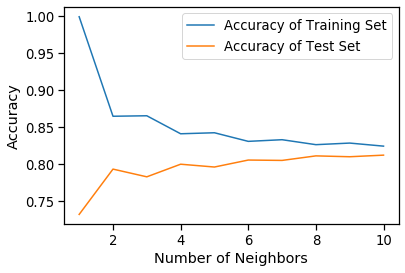

In [57]:
# visualization of both accuracy scores against each other

plt.plot(neighbors_range, train_accuracy, label='Accuracy of Training Set')
plt.plot(neighbors_range, test_accuracy, label='Accuracy of Test Set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

In [43]:
# confusion matrix and classification report on knn classifier

print(cm(y_test, knn.predict(X_test)))
print(classification_report(y_test, knn.predict(X_test)))

[[4534  200]
 [ 933  365]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4734
           1       0.65      0.28      0.39      1298

    accuracy                           0.81      6032
   macro avg       0.74      0.62      0.64      6032
weighted avg       0.79      0.81      0.78      6032



In [84]:
# importing DecisionTreeClassifier and fitting dataset

clf = DecisionTreeClassifier(criterion = 'gini', random_state = None,
                                 max_depth = 3, min_samples_leaf = 5)
clf.fit(X_train, y_train)
prediction = dict()
prediction['DecisionTree'] = clf.predict(X_test)

# print confusion matrix and classification report

t = classification_report(y_test, prediction['DecisionTree'])
print(t)
confusion_matrix = cm(y_test, prediction['DecisionTree'])
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4734
           1       0.67      0.36      0.47      1298

    accuracy                           0.82      6032
   macro avg       0.76      0.65      0.68      6032
weighted avg       0.81      0.82      0.80      6032

[[4506  228]
 [ 834  464]]


###